In [1]:
import subs.QUEST as qu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DecDaqからの数値

In [2]:
dec = qu.readDecDaq01(27207, 1000)
size = dec[0].size

In [3]:
df0 = pd.DataFrame(data = [dec[0],dec[1][10], dec[1][7],dec[1][4],
                           dec[1][16], dec[1][17], dec[1][18], dec[1][19], dec[1][20]]).T
df0.columns = ['time','bz_val_ozp400','bz_val_oz000','bz_val_ozm400',
                                      'bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800']

In [4]:
center = 1.3e-3 #V/G
outer = 9e-3

time = dec[0][0:size-1]
ch4 = -(dec[1][4][1:size]-np.mean(dec[1][4][0:500]))/outer #ozm400
ch7 = (dec[1][7][1:size]-np.mean(dec[1][7][0:500]))/outer #oz000
ch10 = (dec[1][10][1:size]-np.mean(dec[1][10][0:500]))/outer #ozp400
ch16 = (dec[1][16][1:size]-np.mean(dec[1][16][size-1000:size]))/center #czp800
ch17 = (dec[1][17][1:size]-np.mean(dec[1][17][size-1000:size]))/center #czp400
ch18 = (dec[1][18][1:size]-np.mean(dec[1][18][size-1000:size]))/center #cz000
ch19 = -(dec[1][19][1:size]-np.mean(dec[1][19][size-1000:size]))/center #czm400
ch20 = -(dec[1][20][1:size]-np.mean(dec[1][20][size-1000:size]))/center #czm800

In [5]:
df1 = pd.DataFrame((time, ch10, ch7, ch4, ch16, ch17, ch18, ch19, ch20)).T
df1.columns = ['time','bz_val_ozp400','bz_val_oz000','bz_val_ozm400','bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800']

In [6]:
df1

time  bz_val_ozp400  bz_val_oz000  bz_val_ozm400  bz_val_czp800  \
0       0.000       0.896475      0.453263       0.911442       2.479645   
1       0.001       0.203031      0.096930       0.044442       2.475029   
2       0.002       0.098142      0.138485      -0.641114       2.505029   
3       0.003       0.736920      0.272041       0.449442       2.730414   
4       0.004      -0.235192      0.053152       0.003331       2.576568   
...       ...            ...           ...            ...            ...   
29644  29.644      -8.334414     46.360152     -17.773336      -0.074971   
29645  29.645      -8.714192     46.230485     -18.071892       0.349645   
29646  29.646      -8.612525     46.004930     -17.635336       0.272722   
29647  29.647      -8.765080     46.705818     -18.096892       0.131952   
29648  29.648      -8.999858     46.369041     -18.023447      -0.492663   

       bz_val_czp400  bz_val_cz000  bz_val_czm400  bz_val_czm800  
0           1.916029     -2.080645       1.026502       3.704675  
1           1.698337     -2.042184       1.115732       3.811598  
2           1.748337     -2.258338       1.133425       3.869291  
3           1.641414     -1.703722       0.871886       3.882368  
4           1.656029     -2.009876       0.996502       4.049291  
...              ...           ...            ...            ...  
29644      -0.038586      0.107047       0.113425      -0.123017  
29645      -0.023971      0.287816       0.221886       0.114675  
29646       0.438337      0.060124      -0.028883      -0.003017  
29647       0.012952     -0.112953       0.038809       0.473906  
29648      -0.166278      0.003201      -0.030422       0.200829  

[29649 rows x 9 columns]

計算で取得できる数値

In [7]:
caldata = pd.read_csv('mfd_calexpf4.txt')

In [8]:
caldata

Unnamed: 0     time  bz_val_ozp400  bz_val_oz000  bz_val_ozm400  \
0               0 -21.6979      -1.643217     -2.364676      -1.643217   
1               1 -21.6729      -1.775952     -2.497498      -1.775952   
2               2 -21.6479      -1.753709     -2.490699      -1.753709   
3               3 -21.6229      -1.800607     -2.511285      -1.800607   
4               4 -21.5979      -1.784093     -2.525667      -1.784093   
...           ...      ...            ...           ...            ...   
30730       30730  23.2525      -0.087724      0.031093      -0.087724   
30731       30731  23.2775      -0.009527      0.135591      -0.009527   
30732       30732  23.3025      -0.045637      0.073513      -0.045637   
30733       30733  23.3275      -0.036844      0.115570      -0.036844   
30734       30734  23.3525      -0.049960      0.068701      -0.049960   

       bz_val_czp800  bz_val_czp400  bz_val_cz000  bz_val_czm400  \
0         -30.144715     -15.555736    -12.010040     -15.555736   
1         -31.574686     -16.314204    -12.606520     -16.314204   
2         -31.353514     -16.246146    -12.571249     -16.246146   
3         -31.538797     -16.328690    -12.631541     -16.328690   
4         -31.552067     -16.401010    -12.706958     -16.401010   
...              ...            ...           ...            ...   
30730      -0.933064      -0.073057      0.080514      -0.073057   
30731      -0.028789       0.484494      0.545452       0.484494   
30732      -0.499490       0.161676      0.268468       0.161676   
30733      -0.760764       0.228899      0.389645       0.228899   
30734      -0.394881       0.180183      0.268003       0.180183   

       bz_val_czm800  
0         -30.144715  
1         -31.574686  
2         -31.353514  
3         -31.538797  
4         -31.552067  
...              ...  
30730      -0.933064  
30731      -0.028789  
30732      -0.499490  
30733      -0.760764  
30734      -0.394881  

[30735 rows x 10 columns]

In [9]:
def plot_figures1(df):
  res = []
  col = df0.columns
  for cn in col:
    f = plt.figure()
    plt.plot(df['time'], df[cn], label = 'decdaq')
    plt.plot(caldata['time'], caldata[cn], label = 'cal')
    plt.title(cn)
    plt.xlabel('Time(s)')
    plt.ylabel('(G)')
    plt.legend()
    plt.savefig(cn)
    res.append(f)
  #print(len(plt.get_fignums())) # figureの個数を返す。   
  return res

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

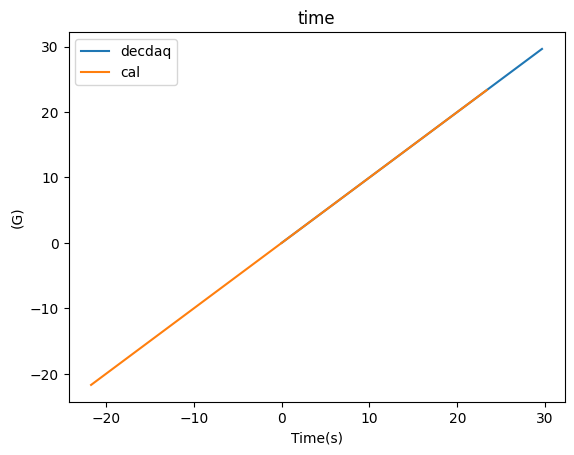

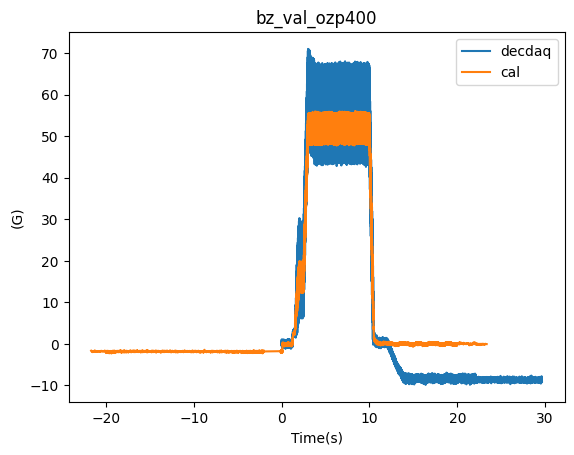

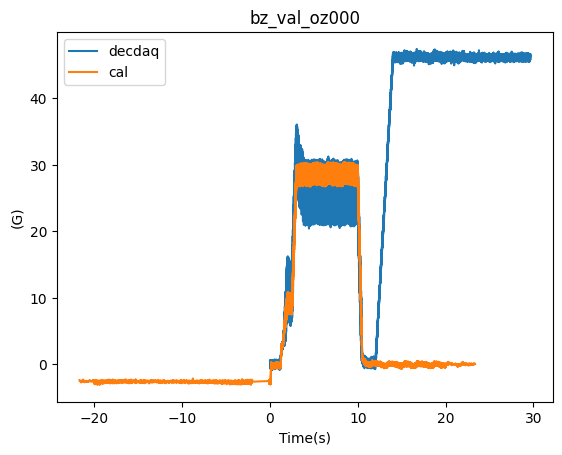

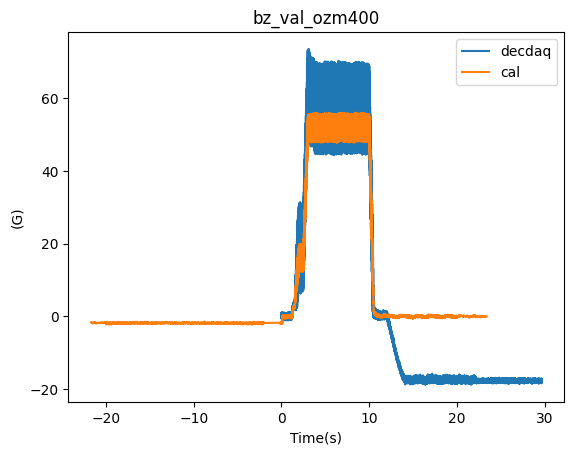

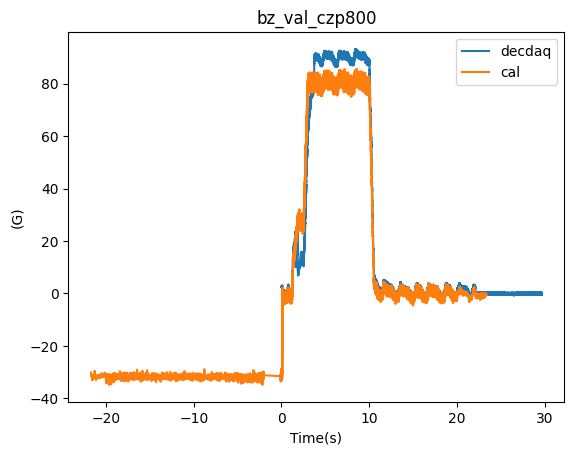

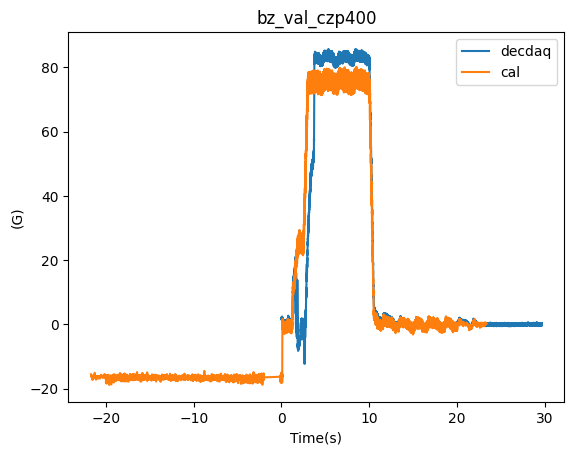

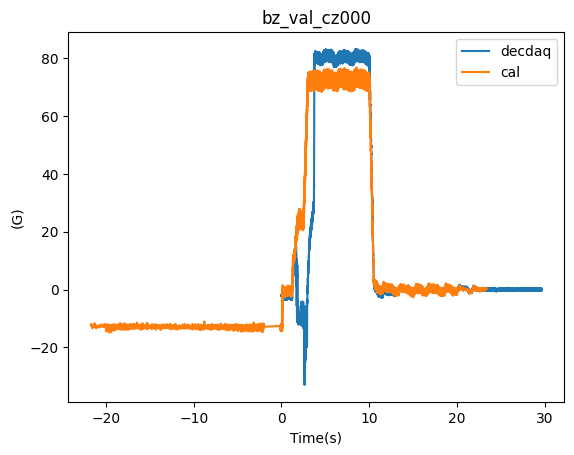

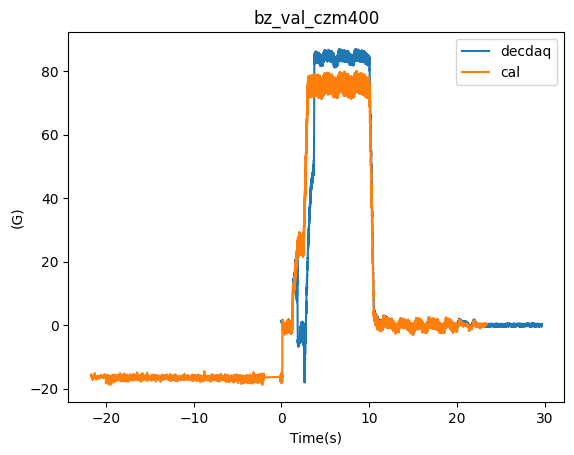

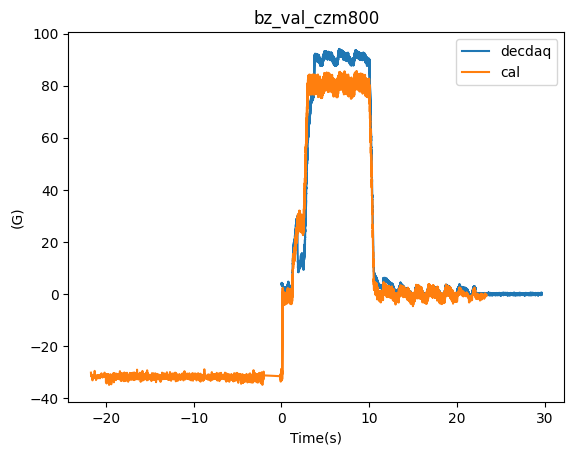

In [10]:
plot_figures1(df1)

In [11]:
def plot_figures2(df):
  res = []
  col = df0.columns
  for cn in col:
    f = plt.figure()
    plt.plot(df['time'], df[cn], label = 'decdaq')
    plt.plot(caldata['time'], caldata[cn], label = 'cal')
    plt.title(cn)
    plt.xlabel('Time(s)')
    plt.xlim(5, 10)
    plt.ylabel('(G)')
    plt.legend()
    plt.savefig(str(cn)+'lim')
    res.append(f)
  #print(len(plt.get_fignums())) # figureの個数を返す。   
  return res

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

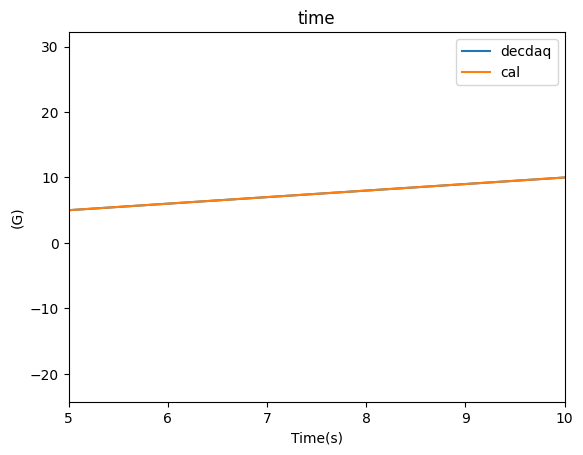

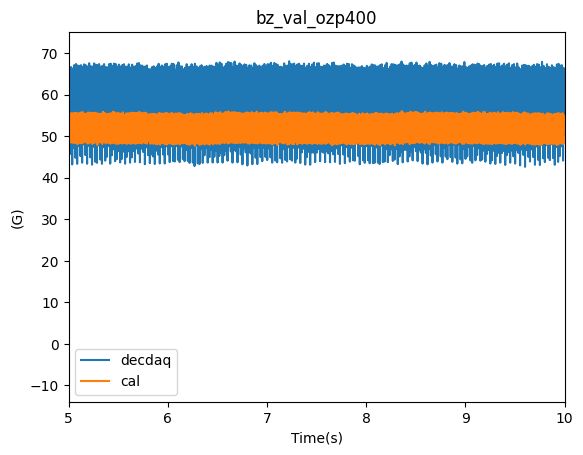

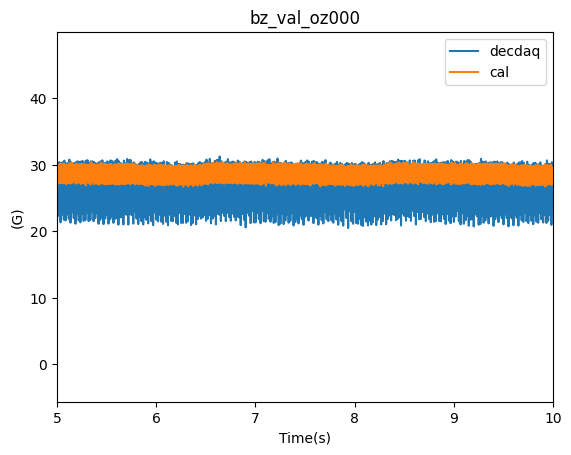

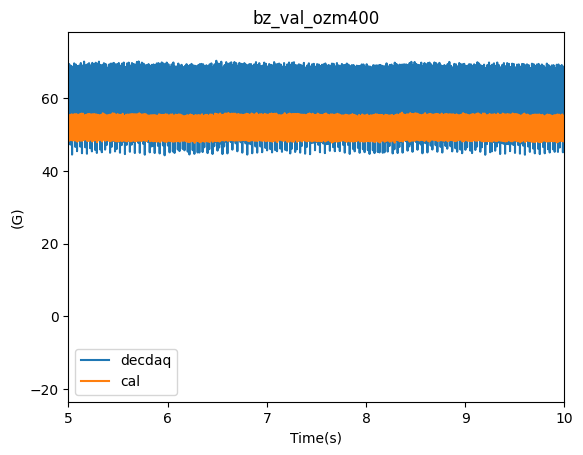

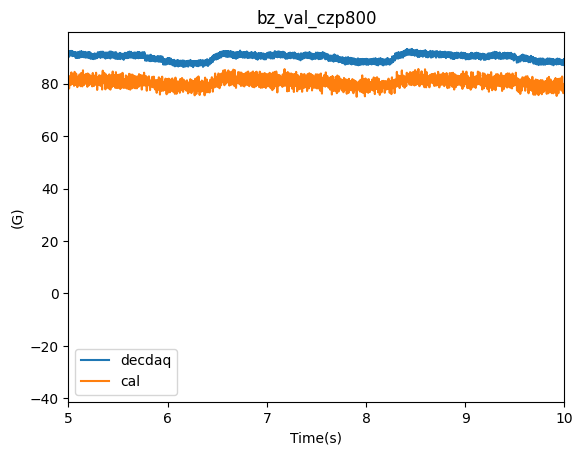

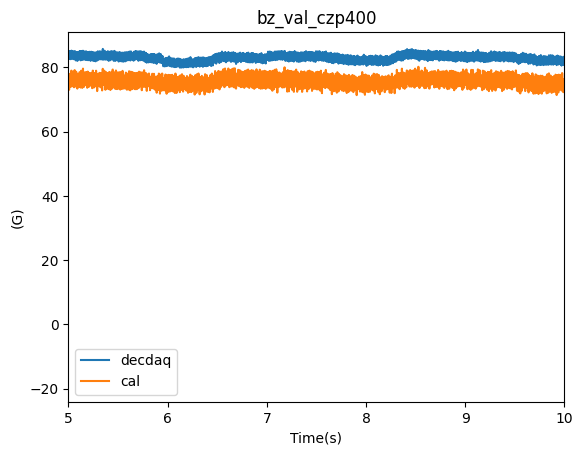

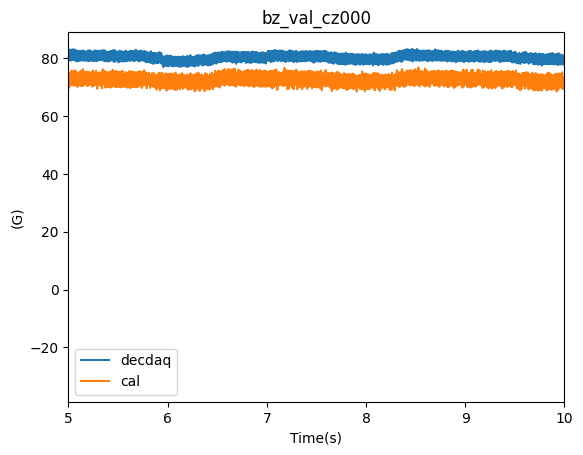

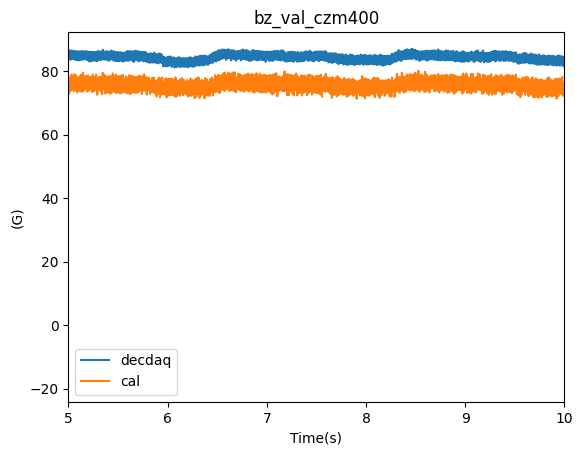

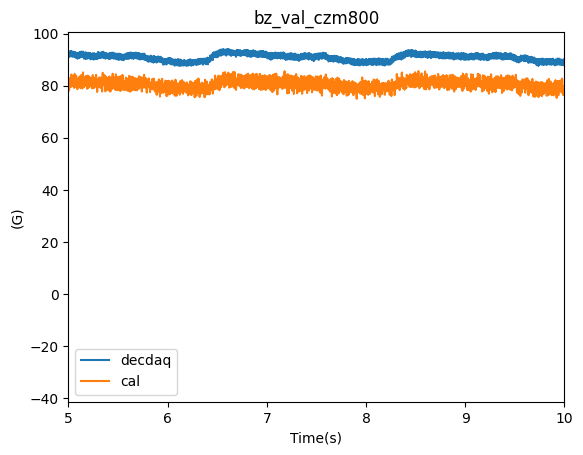

In [12]:
plot_figures2(df1)